In [1]:
from si import *
from g2Fitter import *
import pickle
enable_atlas_python()

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


/home/jlab/miniconda3/lib/python3.7/site-packages/ROOT/_facade.py:121: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return _orig_ihook(name, *args, **kwds)
/home/jlab/miniconda3/lib/python3.7/site-packages/luigi/scheduler.py:211: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class OrderedSet(collections.MutableSet):
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
f = pickle.load(open("../data/fit_test_worker_startTimeScanByCalo__99914b932b__output_hist_startTimeScanByCalo.pickle","rb"))

/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='../data/fit_test_worker_startTimeScanByCalo__99914b932b__output_hist_startTimeScanByCalo.pickle'>
  """Entry point for launching an IPython kernel.


In [3]:
print(f.keys())

dict_keys(['startTimeScan'])


In [4]:
f['startTimeScan'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

<>:23: DeprecationWarning: invalid escape sequence \m
/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


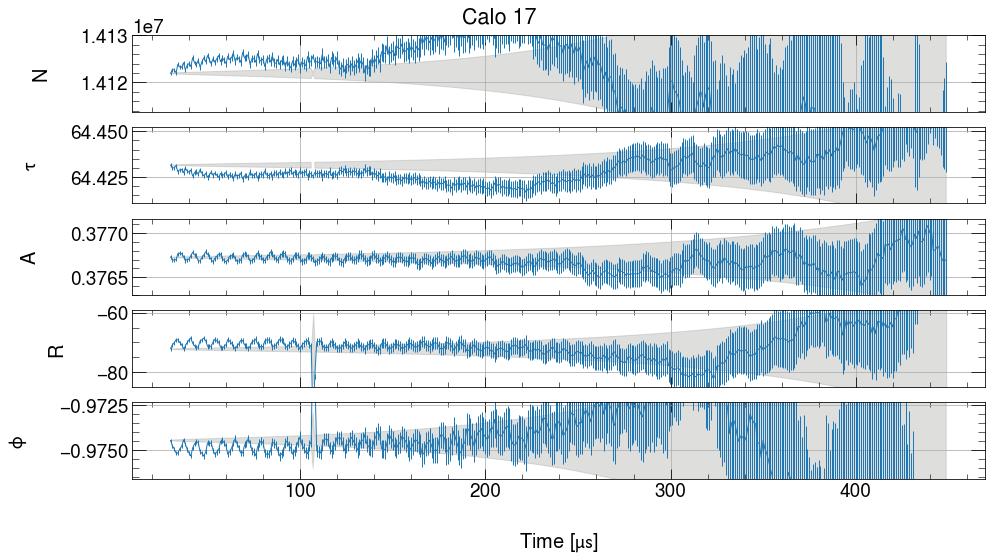

In [5]:
calo = 17

names, times, pars, parErrs = f['startTimeScan'][calo]

fig,ax = plt.subplots(len(names),1, figsize=(15,8), sharex=True)
for i, name in enumerate(names):
    plt.sca(ax[i])
    plt.errorbar(times, pars[name],yerr=parErrs[name])
    plt.ylabel(convertRootLabelsToPython(name))
    
    kawall_band = [np.sqrt( x**2 - parErrs[name][0]**2  ) for x in parErrs[name]]
    plt.fill_between(times, 
                 [pars[name][0] + kawall_band[i] for i,x in enumerate(times)], 
                 [pars[name][0] - kawall_band[i] for i,x in enumerate(times)],
                 alpha = 0.3, interpolate=True, color='xkcd:grey')
    
    plt.ylim(pars[name][0] - parErrs[name][0]*20, 
             pars[name][0] + parErrs[name][0]*20)
    
    plt.grid()
# plt.tight_layout()
plt.suptitle(f"Calo {calo}")
plt.xlabel("Time [$\mu s$]")
plt.show()